In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data=pd.read_csv('/content/netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
data.shape

(8807, 12)

In [ ]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


data type changing

In [ ]:
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

data[['date_added', 'year_added', 'month_added']].head()

,date_added,year_added,month_added
0,2021-09-25,2021.0,9.0
1,2021-09-24,2021.0,9.0
2,2021-09-24,2021.0,9.0
3,2021-09-24,2021.0,9.0
4,2021-09-24,2021.0,9.0


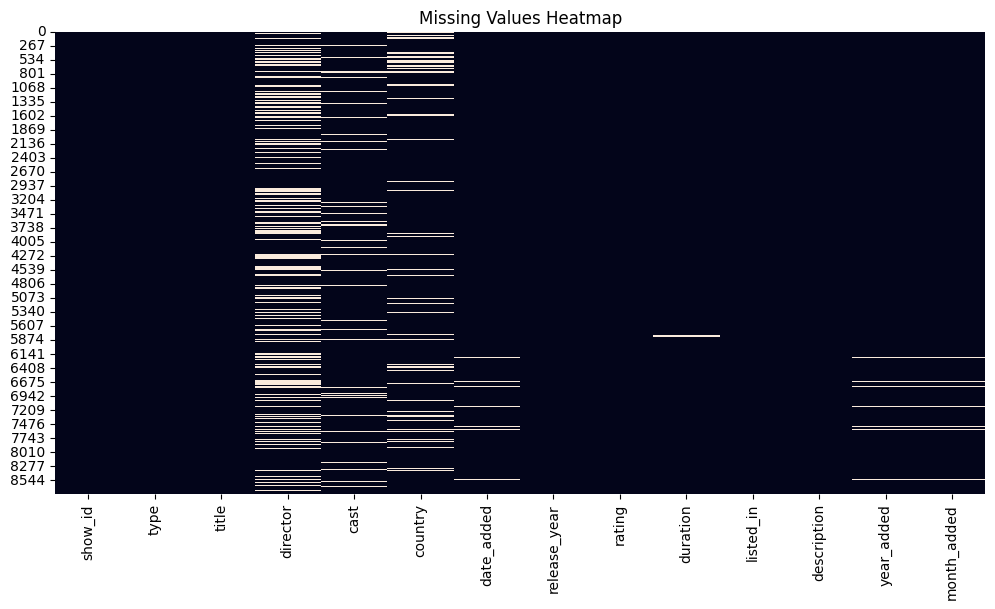

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

Interpretation:

This plot shows which columns contain missing values and helps understand data quality issues.

handling null value

In [ ]:
data['country'].fillna('Unknown', inplace=True)   # country filling with Unknown

/tmp/ipython-input-2239596279.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['country'].fillna('Unknown', inplace=True)   # country filling with Unknown


In [ ]:
data['rating'].fillna(data['rating'].mode()[0], inplace=True)
#rating is filled with mode

/tmp/ipython-input-3650725896.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['rating'].fillna(data['rating'].mode()[0], inplace=True)


In [ ]:
# Only 10 missing rows ...  dropped
data.dropna(subset=['date_added'], inplace=True)

In [ ]:
# Only 3 missing rows .. dropped
data.dropna(subset=['duration'], inplace=True)

In [ ]:
data['director'].fillna('Unknown', inplace=True)  #filling with Unknown


/tmp/ipython-input-2386385297.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['director'].fillna('Unknown', inplace=True)  #filling with Unknown


In [ ]:
data['cast'].fillna('Unknown', inplace=True)   #filling with Unknown

/tmp/ipython-input-767586081.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['cast'].fillna('Unknown', inplace=True)   #filling with Unknown


In [ ]:
data.shape

(8706, 14)

In [ ]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


Content Type Distribution

In [ ]:
data['type'].value_counts()


,count
type,
Movie,6128
TV Show,2578


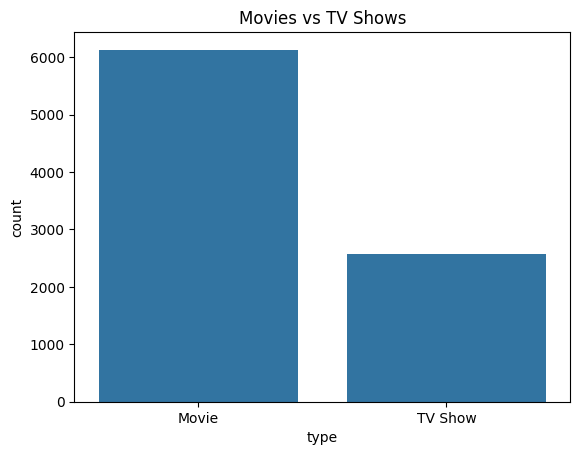

In [ ]:
sns.countplot(x='type', data=data)
plt.title("Movies vs TV Shows")
plt.show()

Interpretation:
The plot shows that Netflix has more Movies than TV Shows. This means Netflix focuses more on movies than on TV shows.

Content Added Over Time

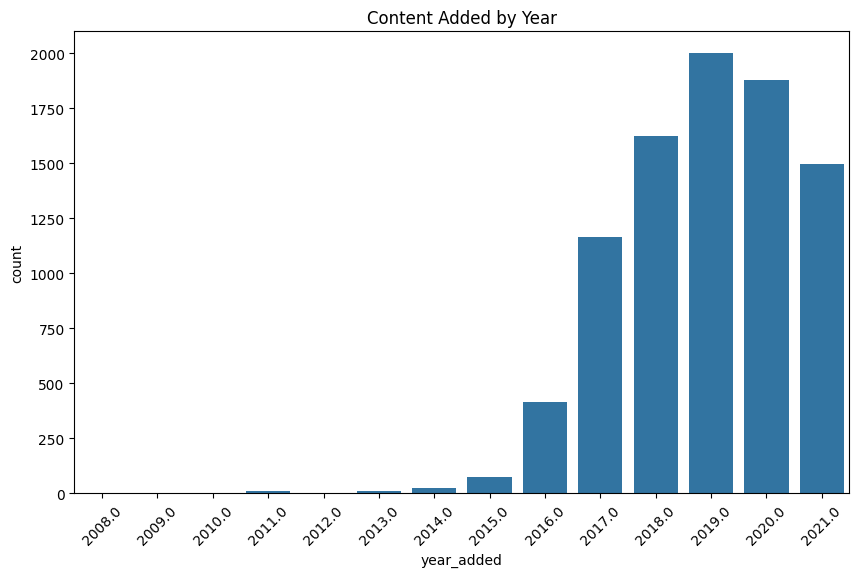

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='year_added', data=data)
plt.xticks(rotation=45)
plt.title("Content Added by Year")
plt.show()

Interpretation:
The number of titles added to Netflix increases a lot after 2015. This shows that Netflix expanded quickly and added more content in recent years.

Movies vs TV Shows by Year

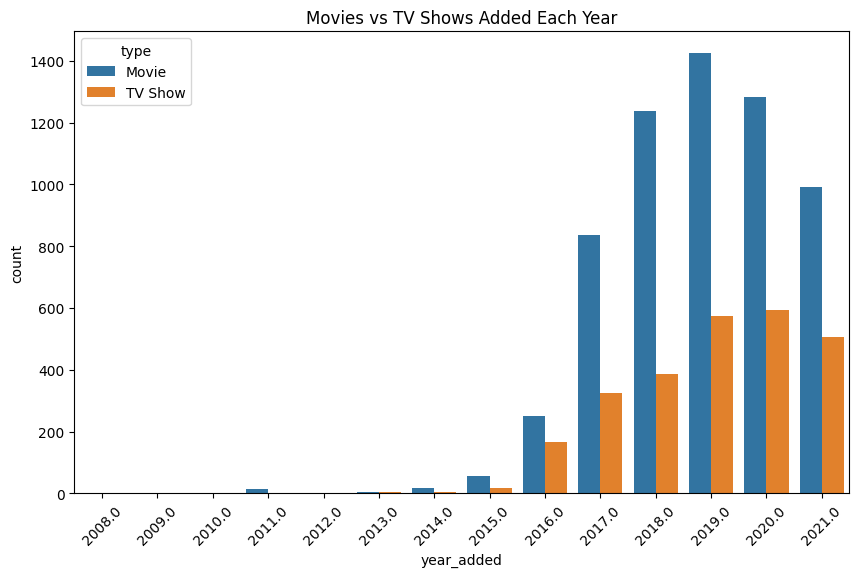

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='year_added', hue='type', data=data)
plt.xticks(rotation=45)
plt.title("Movies vs TV Shows Added Each Year")
plt.show()


Interpretation:
In most years, the number of Movies is higher than TV Shows. However, TV Shows are slowly increasing, which shows that Netflix is investing more in series over time.

Country-wise Content Analysis

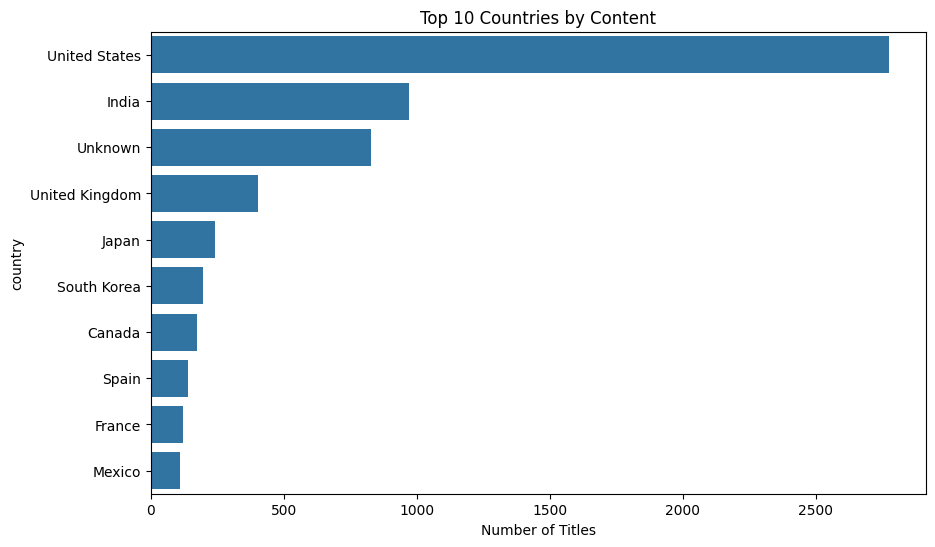

In [ ]:
top_countries = data['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Content")
plt.xlabel("Number of Titles")
plt.show()


Interpretation:
The United States has the most content on Netflix, followed by India and the United Kingdom. This shows that Netflix mainly focuses on English content and Indian regional content.

Rating Distribution

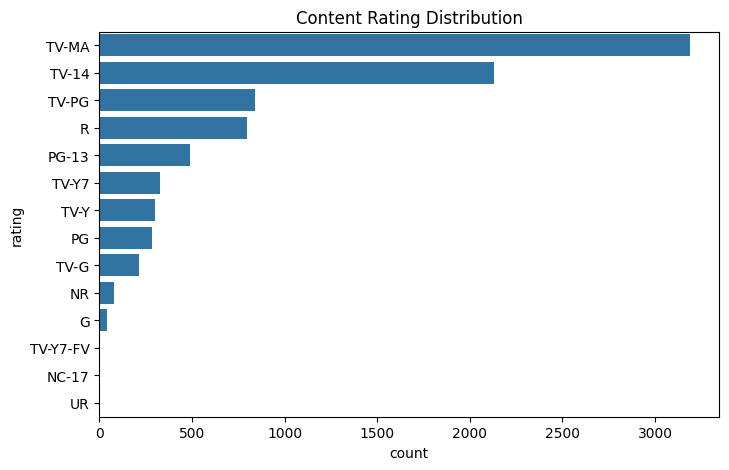

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(y='rating',
              data=data,
              order=data['rating'].value_counts().index)
plt.title("Content Rating Distribution")
plt.show()

Interpretation:
Most Netflix content is rated TV-MA and TV-14. This means Netflix mainly targets adults and young adults, not children.

Duration Analysis

1= Movies

/tmp/ipython-input-340823296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_min'] = movies['duration'].str.replace(' min', '').astype(int)


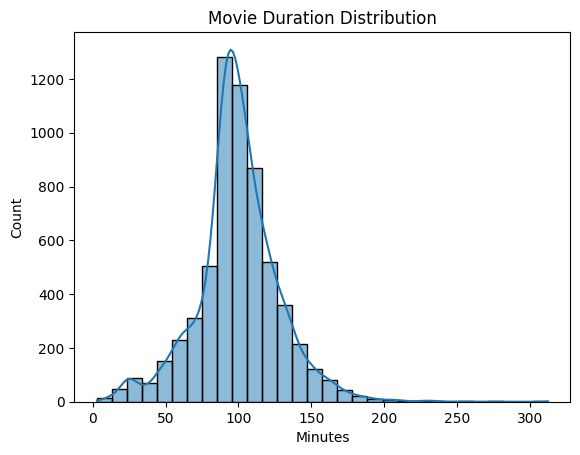

In [ ]:
movies = data[data['type'] == 'Movie']
movies['duration_min'] = movies['duration'].str.replace(' min', '').astype(int)

sns.histplot(movies['duration_min'], bins=30, kde=True)
plt.title("Movie Duration Distribution")
plt.xlabel("Minutes")
plt.show()


Interpretation:
Most movies are between 90 and 120 minutes long, which is the normal length for films. Very long movies are rare on Netflix.

2 = TV Shows

/tmp/ipython-input-1069698124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv['seasons'] = tv['duration'].str.replace(' Seasons', '') \


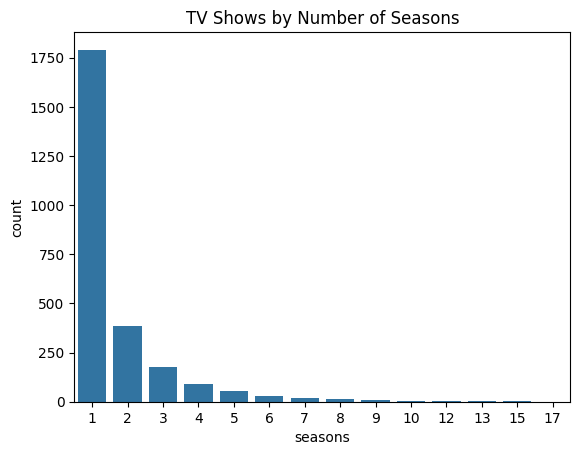

In [ ]:
tv = data[data['type'] == 'TV Show']
tv['seasons'] = tv['duration'].str.replace(' Seasons', '') \
                              .str.replace(' Season', '') \
                              .astype(int)

sns.countplot(x='seasons', data=tv)
plt.title("TV Shows by Number of Seasons")
plt.show()


Interpretation:

Most TV Shows have only one or two seasons, indicating that limited-series or short-running shows are more common on Netflix than long-running series.

Genre Analysis

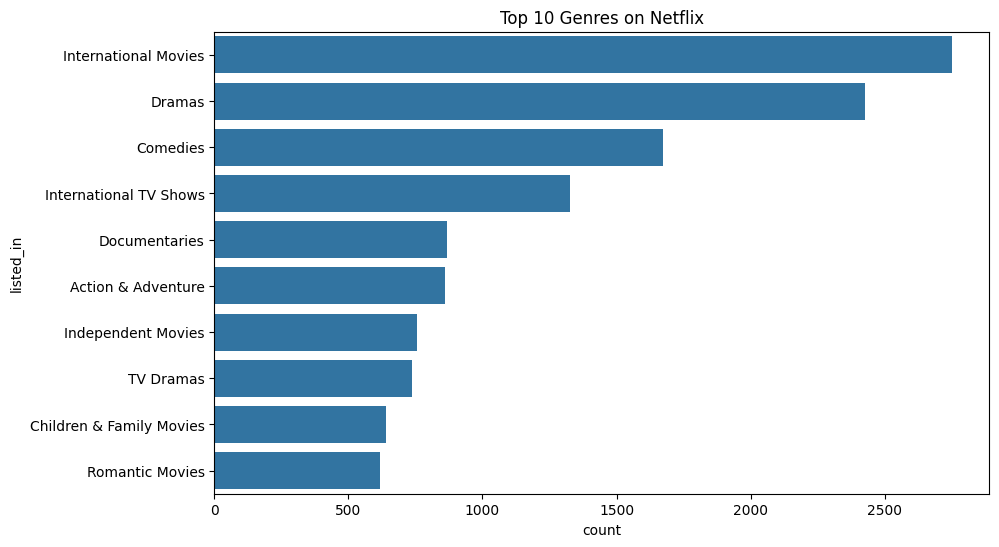

In [ ]:
genres = data['listed_in'].str.split(', ').explode()

plt.figure(figsize=(10,6))
sns.countplot(y=genres.reset_index(drop=True),
              order=genres.value_counts().head(10).index)
plt.title("Top 10 Genres on Netflix")
plt.show()

Interpretation:
Dramas, International Movies, and Comedies are the most common genres on Netflix. This shows that Netflix focuses a lot on emotional stories and content that appeals to people around the world.

Release Year Analysis

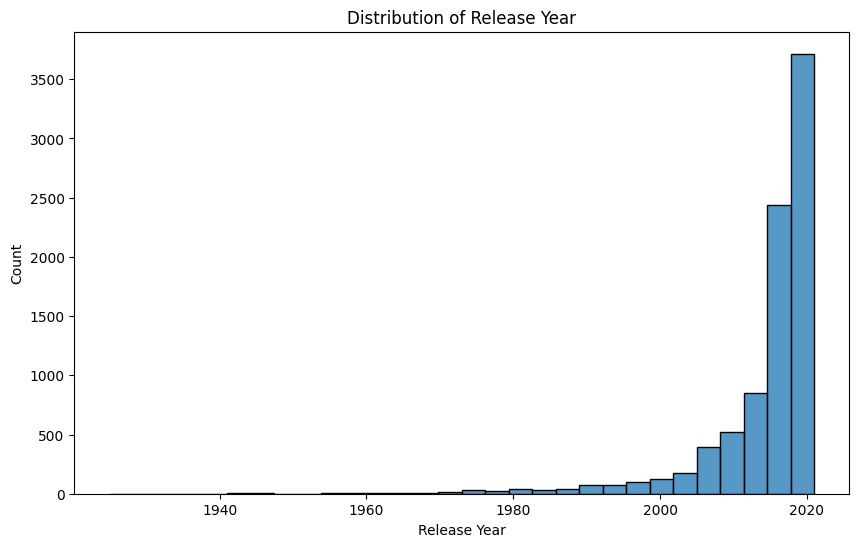

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data['release_year'], bins=30)
plt.title("Distribution of Release Year")
plt.xlabel("Release Year")
plt.show()


Interpretation:

The majority of content was released after 2000, with a sharp rise after 2010. This confirms that Netflix mainly focuses on modern content rather than classic titles.

Release Year vs Type (Boxplot – Relationship Plot)

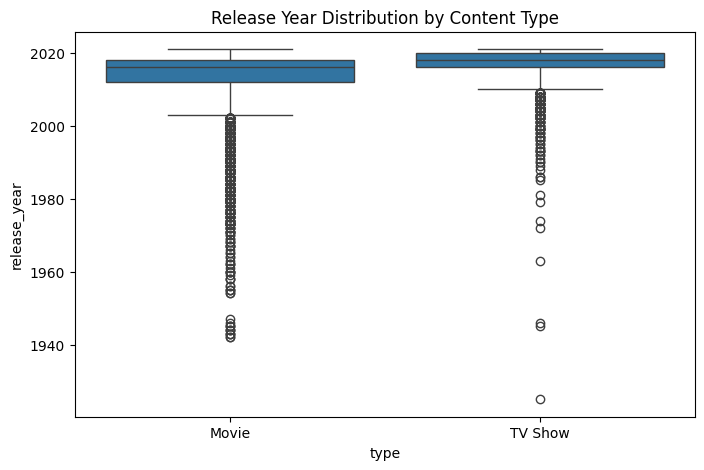

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='type', y='release_year', data=data)
plt.title("Release Year Distribution by Content Type")
plt.show()

Interpretation:

Movies and TV Shows show different release year distributions, indicating variation in content freshness.

Country vs Type (Top Countries Comparison)



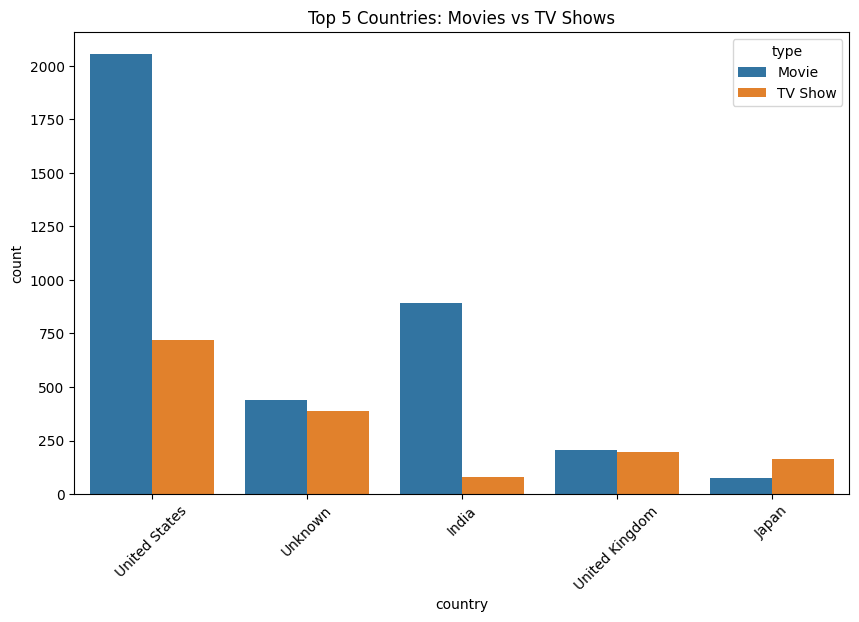

In [ ]:
top5 = data['country'].value_counts().head(5).index
country_type = data[data['country'].isin(top5)]

plt.figure(figsize=(10,6))
sns.countplot(x='country', hue='type', data=country_type)
plt.xticks(rotation=45)
plt.title("Top 5 Countries: Movies vs TV Shows")
plt.show()




Interpretation:

Shows how content type differs across major producing countries.

Trend Line: Content Growth Over Years



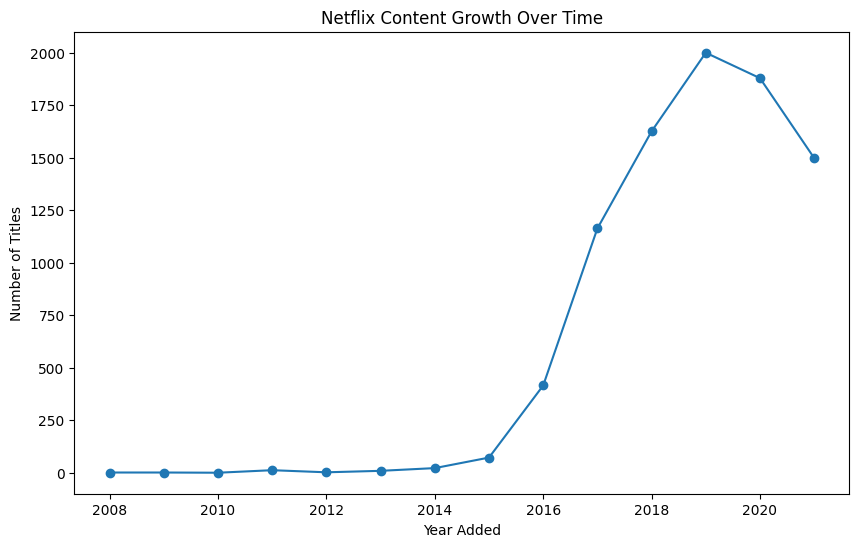

In [ ]:
yearly = data['year_added'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.plot(yearly.index, yearly.values, marker='o')
plt.title("Netflix Content Growth Over Time")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()





Interpretation:

Shows Netflix expansion trend over time.


In [ ]:
data.to_csv("netflix_cleaned.csv", index=False) #to save cleaned data


In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0
